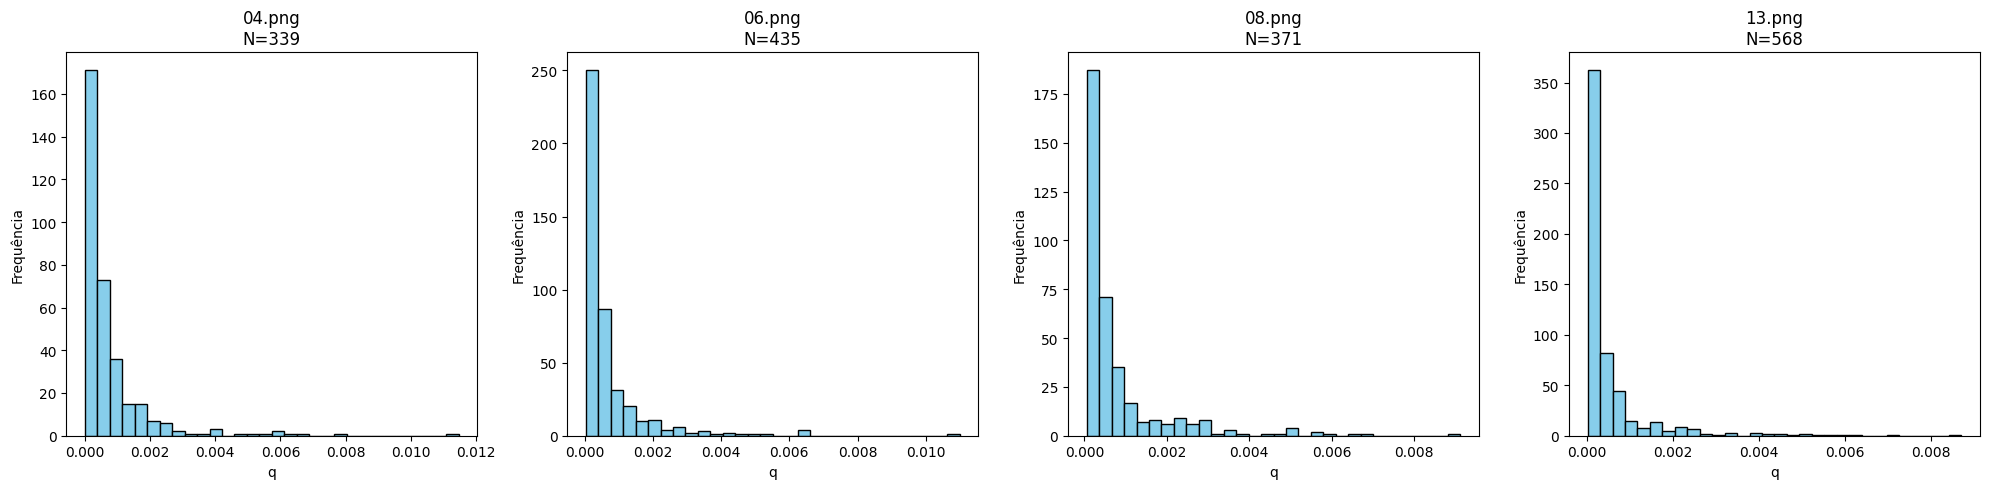

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

# Caminho do JSON com os contornos e valores de q
json_path = "dataset_contours_aggregate.json"

# Carrega os dados
with open(json_path, 'r') as f:
    contours_data = json.load(f)

# Lista de imagens disponíveis no JSON
image_keys = list(contours_data.keys())

# Seleciona aleatoriamente 4 imagens para plot
selected_images = random.sample(image_keys, 4)

# Cria subplots 1 linha, 4 colunas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image_name in enumerate(selected_images):
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    
    axes[i].hist(q_values, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{image_name}\nN={len(q_values)}")
    axes[i].set_xlabel('q')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


In [25]:
# Lista para armazenar os resultados estatísticos
stats = []

for image_name in image_keys:
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    mean_q = np.mean(q_values)
    std_q = np.std(q_values)
    stats.append({
        "imagem": image_name,
        "n_contornos": len(q_values),
        "media_q": mean_q,
        "desvio_padrao_q": std_q,
        "min_q": np.min(q_values),
        "max_q": np.max(q_values)
    })

# Cria um DataFrame com os resultados
df_stats = pd.DataFrame(stats)

print(df_stats)

df_stats.to_excel("estatisticas_q.xlsx", index=False)


    imagem  n_contornos   media_q  desvio_padrao_q     min_q     max_q
0   01.png          376  0.000835         0.001508  0.000023  0.015384
1   02.png          321  0.000706         0.000746  0.000021  0.005891
2   03.png          560  0.000546         0.000924  0.000008  0.008486
3   04.png          339  0.000789         0.001226  0.000000  0.011468
4   05.png          426  0.000743         0.001182  0.000035  0.011135
5   06.png          435  0.000681         0.001076  0.000032  0.010992
6   07.png          355  0.000853         0.001445  0.000051  0.014210
7   08.png          371  0.000808         0.001190  0.000056  0.009124
8   09.png          361  0.000865         0.001341  0.000036  0.008343
9   10.png          364  0.000825         0.000990  0.000033  0.006397
10  11.png          322  0.000870         0.001237  0.000050  0.009144
11  12.png          323  0.000818         0.001023  0.000054  0.006279
12  13.png          568  0.000543         0.000998  0.000018  0.008698
13  14

N total de contornos: 7038
Média q: 0.000706
Desvio padrão q: 0.001141
Range q: de 0.000008 até 0.015384


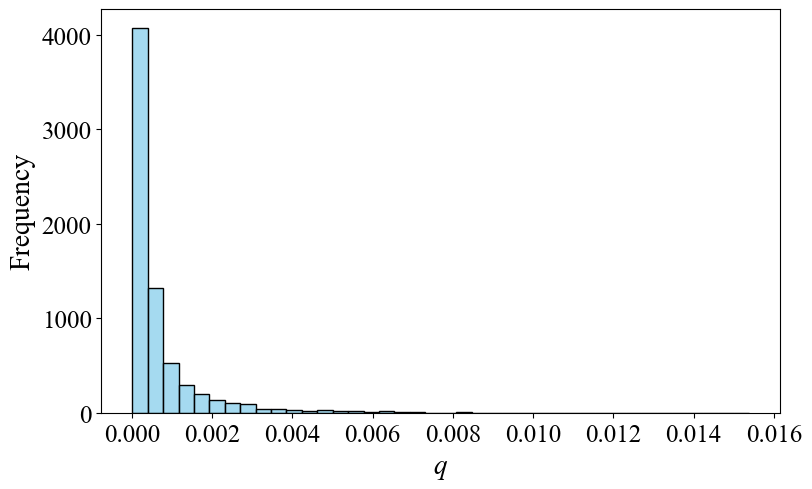

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você já tenha contours_data e image_keys carregados
# Aqui vamos extrair todos os valores de q em uma única lista
q_all = []

for image_name in image_keys:
    q_vals = [contour['q'] for contour in contours_data[image_name].values()]
    q_all.extend(q_vals)

q_all = np.array(q_all)
q_all = q_all[q_all > 0]  # remove valores negativos ou zero, se existirem

# Estatísticas básicas
media_q = np.mean(q_all)
desvio_q = np.std(q_all)
min_q, max_q = np.min(q_all), np.max(q_all)
n_total = len(q_all)

print(f"N total de contornos: {n_total}")
print(f"Média q: {media_q:.6f}")
print(f"Desvio padrão q: {desvio_q:.6f}")
print(f"Range q: de {min_q:.6f} até {max_q:.6f}")

# Configurações globais de estilo
plt.rcParams.update({
    "font.family": "Times New Roman",  # Fonte
    "axes.labelsize": 20,              # Tamanho dos rótulos dos eixos
    "xtick.labelsize": 18,             # Tamanho dos valores do eixo x
    "ytick.labelsize": 18              # Tamanho dos valores do eixo y
})

# Geração da Figura 2
plt.figure(figsize=(8, 5))
sns.histplot(q_all, bins=40, kde=False, color='skyblue', edgecolor='black')
plt.xlabel("q", style='italic')
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("q_hist_all_dataset.png", format='png', dpi=600)
plt.show()
